In [24]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.metrics import silhouette_score, v_measure_score, adjusted_rand_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import hdbscan

In [3]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

#last column is the target for the following dataset
breast = pd.read_csv('project1/breast_wisc_dataset.csv', header=0)
X_breast_wisc = breast.iloc[:, :-1]
y_breast_wisc = breast.iloc[:, -1]
print(y_breast_wisc)

cybersecurity = pd.read_csv('project1/cybersecurity_data.csv', header=0)
X_cybersecurity = cybersecurity.iloc[:, :-1]
y_cybersecurity = cybersecurity.iloc[:, -1]

aapl = pd.read_csv('project1/HFT_AAPL_data.csv', header=0)
# drop the Date column and first column
aapl = aapl.drop(columns=['Date'])
aapl = aapl.drop(columns=[aapl.columns[0]])
X_aapl = aapl.iloc[:, 1:]
y_aapl = aapl.iloc[:, 0]



0         Benign
1         Benign
2         Benign
3         Benign
4         Benign
         ...    
564       Benign
565       Benign
566       Benign
567       Benign
568    Malignant
Name: label, Length: 569, dtype: object


In [7]:
def SSScaleData(X):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

def MMScaleData(X):
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    return X

def RBScaleData(X):
    scaler = RobustScaler()
    X = scaler.fit_transform(X)
    return X

def MAScaleData(X):
    scaler = MaxAbsScaler()
    X = scaler.fit_transform(X)
    return X

In [10]:
def do_kmeans(X, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    return y_pred

def do_hdbscan(X, min_cluster_size):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    clusterer.fit(X)
    y_pred = clusterer.labels_
    return y_pred

def do_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X)
    y_pred = dbscan.labels_
    return y_pred

def do_optics(X, min_samples, xi):
    optics = OPTICS(min_samples=min_samples, xi=xi)
    optics.fit(X)
    y_pred = optics.labels_
    return y_pred

def do_bisecting_kmeans(X, k):
    Z = linkage(X, 'ward')
    y_pred = fcluster(Z, k, criterion='maxclust')
    return y_pred

In [8]:
X_aapl_scaled_ss = SSScaleData(X_aapl)
X_aapl_scaled_mm = MMScaleData(X_aapl)
X_aapl_scaled_rb = RBScaleData(X_aapl)
X_aapl_scaled_ma = MAScaleData(X_aapl)

X_iris_scaled_ss = SSScaleData(X_iris)
X_iris_scaled_mm = MMScaleData(X_iris)
X_iris_scaled_rb = RBScaleData(X_iris)
X_iris_scaled_ma = MAScaleData(X_iris)

X_breast_wisc_scaled_ss = SSScaleData(X_breast_wisc)
X_breast_wisc_scaled_mm = MMScaleData(X_breast_wisc)
X_breast_wisc_scaled_rb = RBScaleData(X_breast_wisc)
X_breast_wisc_scaled_ma = MAScaleData(X_breast_wisc)

X_cybersecurity_scaled_ss = SSScaleData(X_cybersecurity)
X_cybersecurity_scaled_mm = MMScaleData(X_cybersecurity)
X_cybersecurity_scaled_rb = RBScaleData(X_cybersecurity)
X_cybersecurity_scaled_ma = MAScaleData(X_cybersecurity)



In [17]:
def evaluate_clustering(X, labels_true, labels_pred):
    unique_labels = np.unique(labels_pred)
    if len(unique_labels) > 1:  # Check if there's more than one cluster
        silhouette = silhouette_score(X, labels_pred)
        v_measure = v_measure_score(labels_true, labels_pred)
        ari = adjusted_rand_score(labels_true, labels_pred)
        nmi = normalized_mutual_info_score(labels_true, labels_pred)
        ami = adjusted_mutual_info_score(labels_true, labels_pred)
        return silhouette, v_measure, ari, nmi, ami
    else:
        print("Not enough clusters to evaluate. Found labels:", unique_labels)
        return None, None, None, None, None

In [ ]:
iris_data_dict = {}

labels_kmeans_iris_ss = do_kmeans(X_iris_scaled_ss, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ss, y_iris, labels_kmeans_iris_ss)
print(f"KMeans - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['KMeans_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_iris_ss = do_hdbscan(X_iris_scaled_ss, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ss, y_iris, labels_hdbscan_iris_ss)
print(f"HDBSCAN - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['HDBSCAN_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_iris_ss = do_dbscan(X_iris_scaled_ss, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ss, y_iris, labels_dbscan_iris_ss)
print(f"DBSCAN - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['DBSCAN_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_iris_ss = do_optics(X_iris_scaled_ss, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ss, y_iris, labels_optics_iris_ss)
print(f"OPTICS - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['OPTICS_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_iris_ss = do_bisecting_kmeans(X_iris_scaled_ss, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ss, y_iris, labels_bisecting_kmeans_iris_ss)
print(f"Bisecting KMeans - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['Bisecting KMeans_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_iris_mm = do_kmeans(X_iris_scaled_mm, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_mm, y_iris, labels_kmeans_iris_mm)
print(f"KMeans - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['KMeans_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_iris_mm = do_hdbscan(X_iris_scaled_mm, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_mm, y_iris, labels_hdbscan_iris_mm)
print(f"HDBSCAN - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['HDBSCAN_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_iris_mm = do_dbscan(X_iris_scaled_mm, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_mm, y_iris, labels_dbscan_iris_mm)
print(f"DBSCAN - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['DBSCAN_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_iris_mm = do_optics(X_iris_scaled_mm, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_mm, y_iris, labels_optics_iris_mm)
print(f"OPTICS - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['OPTICS_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_iris_mm = do_bisecting_kmeans(X_iris_scaled_mm, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_mm, y_iris, labels_bisecting_kmeans_iris_mm)
print(f"Bisecting KMeans - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['Bisecting KMeans_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_iris_rb = do_kmeans(X_iris_scaled_rb, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_rb, y_iris, labels_kmeans_iris_rb)
print(f"KMeans - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['KMeans_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_iris_rb = do_hdbscan(X_iris_scaled_rb, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_rb, y_iris, labels_hdbscan_iris_rb)
print(f"HDBSCAN - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['HDBSCAN_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_iris_rb = do_dbscan(X_iris_scaled_rb, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_rb, y_iris, labels_dbscan_iris_rb)
print(f"DBSCAN - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['DBSCAN_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_iris_rb = do_optics(X_iris_scaled_rb, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_rb, y_iris, labels_optics_iris_rb)
print(f"OPTICS - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['OPTICS_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_iris_rb = do_bisecting_kmeans(X_iris_scaled_rb, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_rb, y_iris, labels_bisecting_kmeans_iris_rb)
print(f"Bisecting KMeans - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['Bisecting KMeans_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_iris_ma = do_kmeans(X_iris_scaled_ma, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ma, y_iris, labels_kmeans_iris_ma)
print(f"KMeans - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['KMeans_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_iris_ma = do_hdbscan(X_iris_scaled_ma, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ma, y_iris, labels_hdbscan_iris_ma)
print(f"HDBSCAN - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['HDBSCAN_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_iris_ma = do_dbscan(X_iris_scaled_ma, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ma, y_iris, labels_dbscan_iris_ma)
print(f"DBSCAN - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['DBSCAN_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_iris_ma = do_optics(X_iris_scaled_ma, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ma, y_iris, labels_optics_iris_ma)
print(f"OPTICS - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['OPTICS_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_iris_ma = do_bisecting_kmeans(X_iris_scaled_ma, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ma, y_iris, labels_bisecting_kmeans_iris_ma)
print(f"Bisecting KMeans - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['Bisecting KMeans_ma'] = [silhouette, v_measure, ari, nmi, ami]


In [32]:
breast_data_dict = {}

labels_kmeans_breast_ss = do_kmeans(X_breast_wisc_scaled_ss, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ss, y_breast_wisc, labels_kmeans_breast_ss)
print(f"KMeans - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['KMeans_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_breast_ss = do_hdbscan(X_breast_wisc_scaled_ss, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ss, y_breast_wisc, labels_hdbscan_breast_ss)
print(f"HDBSCAN - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['HDBSCAN_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_breast_ss = do_dbscan(X_breast_wisc_scaled_ss, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ss, y_breast_wisc, labels_dbscan_breast_ss)
print(f"DBSCAN - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['DBSCAN_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_breast_ss = do_optics(X_breast_wisc_scaled_ss, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ss, y_breast_wisc, labels_optics_breast_ss)
print(f"OPTICS - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['OPTICS_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_breast_ss = do_bisecting_kmeans(X_breast_wisc_scaled_ss, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ss, y_breast_wisc, labels_bisecting_kmeans_breast_ss)
print(f"Bisecting KMeans - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['Bisecting KMeans_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_breast_mm = do_kmeans(X_breast_wisc_scaled_mm, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_mm, y_breast_wisc, labels_kmeans_breast_mm)
print(f"KMeans - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['KMeans_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_breast_mm = do_hdbscan(X_breast_wisc_scaled_mm, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_mm, y_breast_wisc, labels_hdbscan_breast_mm)
print(f"HDBSCAN - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['HDBSCAN_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_breast_mm = do_dbscan(X_breast_wisc_scaled_mm, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_mm, y_breast_wisc, labels_dbscan_breast_mm)
print(f"DBSCAN - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['DBSCAN_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_breast_mm = do_optics(X_breast_wisc_scaled_mm, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_mm, y_breast_wisc, labels_optics_breast_mm)
print(f"OPTICS - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['OPTICS_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_breast_mm = do_bisecting_kmeans(X_breast_wisc_scaled_mm, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_mm, y_breast_wisc, labels_bisecting_kmeans_breast_mm)
print(f"Bisecting KMeans - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['Bisecting KMeans_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_breast_rb = do_kmeans(X_breast_wisc_scaled_rb, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_rb, y_breast_wisc, labels_kmeans_breast_rb)
print(f"KMeans - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['KMeans_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_breast_rb = do_hdbscan(X_breast_wisc_scaled_rb, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_rb, y_breast_wisc, labels_hdbscan_breast_rb)
print(f"HDBSCAN - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['HDBSCAN_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_breast_rb = do_dbscan(X_breast_wisc_scaled_rb, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_rb, y_breast_wisc, labels_dbscan_breast_rb)
print(f"DBSCAN - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['DBSCAN_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_breast_rb = do_optics(X_breast_wisc_scaled_rb, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_rb, y_breast_wisc, labels_optics_breast_rb)
print(f"OPTICS - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['OPTICS_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_breast_rb = do_bisecting_kmeans(X_breast_wisc_scaled_rb, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_rb, y_breast_wisc, labels_bisecting_kmeans_breast_rb)
print(f"Bisecting KMeans - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['Bisecting KMeans_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_breast_ma = do_kmeans(X_breast_wisc_scaled_ma, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ma, y_breast_wisc, labels_kmeans_breast_ma)
print(f"KMeans - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['KMeans_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_breast_ma = do_hdbscan(X_breast_wisc_scaled_ma, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ma, y_breast_wisc, labels_hdbscan_breast_ma)
print(f"HDBSCAN - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['HDBSCAN_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_breast_ma = do_dbscan(X_breast_wisc_scaled_ma, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ma, y_breast_wisc, labels_dbscan_breast_ma)
print(f"DBSCAN - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['DBSCAN_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_breast_ma = do_optics(X_breast_wisc_scaled_ma, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ma, y_breast_wisc, labels_optics_breast_ma)
print(f"OPTICS - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['OPTICS_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_breast_ma = do_bisecting_kmeans(X_breast_wisc_scaled_ma, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ma, y_breast_wisc, labels_bisecting_kmeans_breast_ma)
print(f"Bisecting KMeans - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['Bisecting KMeans_ma'] = [silhouette, v_measure, ari, nmi, ami]

KMeans - Breast: Silhouette=0.34473443466110537, V-measure=0.5620209362063822, ARI=0.676504895633523, NMI=0.562020936206382, AMI=0.5614236115416241
HDBSCAN - Breast: Silhouette=-0.04785267103956942, V-measure=0.19899510374253104, ARI=0.11855419155787604, NMI=0.19899510374253104, AMI=0.19688538402761727
Not enough clusters to evaluate. Found labels: [-1]
DBSCAN - Breast: Silhouette=None, V-measure=None, ARI=None, NMI=None, AMI=None
OPTICS - Breast: Silhouette=-0.0956040536590282, V-measure=0.05136362301784874, ARI=0.02766435305873905, NMI=0.05136362301784875, AMI=0.049012400828400714
Bisecting KMeans - Breast: Silhouette=0.33938477753669855, V-measure=0.4569149200498728, ARI=0.5750409366326297, NMI=0.45691492004987283, AMI=0.4561712931139444
KMeans - Breast: Silhouette=0.3845494883485513, V-measure=0.6230860242027794, ARI=0.7301749027614344, NMI=0.6230860242027795, AMI=0.6225724776699424
HDBSCAN - Breast: Silhouette=0.03245235755241684, V-measure=0.25121619875393736, ARI=0.2508404124788

In [33]:
cybersecurity_data_dict = {}

labels_kmeans_cybersecurity_ss = do_kmeans(X_cybersecurity_scaled_ss, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ss, y_cybersecurity, labels_kmeans_cybersecurity_ss)
print(f"KMeans - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['KMeans_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_cybersecurity_ss = do_hdbscan(X_cybersecurity_scaled_ss, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ss, y_cybersecurity, labels_hdbscan_cybersecurity_ss)
print(f"HDBSCAN - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['HDBSCAN_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_cybersecurity_ss = do_dbscan(X_cybersecurity_scaled_ss, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ss, y_cybersecurity, labels_dbscan_cybersecurity_ss)
print(f"DBSCAN - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['DBSCAN_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_cybersecurity_ss = do_optics(X_cybersecurity_scaled_ss, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ss, y_cybersecurity, labels_optics_cybersecurity_ss)
print(f"OPTICS - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['OPTICS_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_cybersecurity_ss = do_bisecting_kmeans(X_cybersecurity_scaled_ss, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ss, y_cybersecurity, labels_bisecting_kmeans_cybersecurity_ss)
print(f"Bisecting KMeans - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['Bisecting KMeans_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_cybersecurity_mm = do_kmeans(X_cybersecurity_scaled_mm, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_mm, y_cybersecurity, labels_kmeans_cybersecurity_mm)
print(f"KMeans - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['KMeans_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_cybersecurity_mm = do_hdbscan(X_cybersecurity_scaled_mm, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_mm, y_cybersecurity, labels_hdbscan_cybersecurity_mm)
print(f"HDBSCAN - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['HDBSCAN_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_cybersecurity_mm = do_dbscan(X_cybersecurity_scaled_mm, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_mm, y_cybersecurity, labels_dbscan_cybersecurity_mm)
print(f"DBSCAN - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['DBSCAN_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_cybersecurity_mm = do_optics(X_cybersecurity_scaled_mm, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_mm, y_cybersecurity, labels_optics_cybersecurity_mm)
print(f"OPTICS - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['OPTICS_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_cybersecurity_mm = do_bisecting_kmeans(X_cybersecurity_scaled_mm, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_mm, y_cybersecurity, labels_bisecting_kmeans_cybersecurity_mm)
print(f"Bisecting KMeans - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['Bisecting KMeans_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_cybersecurity_rb = do_kmeans(X_cybersecurity_scaled_rb, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_rb, y_cybersecurity, labels_kmeans_cybersecurity_rb)
print(f"KMeans - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['KMeans_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_cybersecurity_rb = do_hdbscan(X_cybersecurity_scaled_rb, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_rb, y_cybersecurity, labels_hdbscan_cybersecurity_rb)
print(f"HDBSCAN - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['HDBSCAN_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_cybersecurity_rb = do_dbscan(X_cybersecurity_scaled_rb, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_rb, y_cybersecurity, labels_dbscan_cybersecurity_rb)
print(f"DBSCAN - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['DBSCAN_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_cybersecurity_rb = do_optics(X_cybersecurity_scaled_rb, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_rb, y_cybersecurity, labels_optics_cybersecurity_rb)
print(f"OPTICS - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['OPTICS_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_cybersecurity_rb = do_bisecting_kmeans(X_cybersecurity_scaled_rb, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_rb, y_cybersecurity, labels_bisecting_kmeans_cybersecurity_rb)
print(f"Bisecting KMeans - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['Bisecting KMeans_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_cybersecurity_ma = do_kmeans(X_cybersecurity_scaled_ma, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ma, y_cybersecurity, labels_kmeans_cybersecurity_ma)
print(f"KMeans - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['KMeans_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_cybersecurity_ma = do_hdbscan(X_cybersecurity_scaled_ma, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ma, y_cybersecurity, labels_hdbscan_cybersecurity_ma)
print(f"HDBSCAN - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['HDBSCAN_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_cybersecurity_ma = do_dbscan(X_cybersecurity_scaled_ma, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ma, y_cybersecurity, labels_dbscan_cybersecurity_ma)
print(f"DBSCAN - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['DBSCAN_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_cybersecurity_ma = do_optics(X_cybersecurity_scaled_ma, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ma, y_cybersecurity, labels_optics_cybersecurity_ma)
print(f"OPTICS - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['OPTICS_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_cybersecurity_ma = do_bisecting_kmeans(X_cybersecurity_scaled_ma, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ma, y_cybersecurity, labels_bisecting_kmeans_cybersecurity_ma)
print(f"Bisecting KMeans - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['Bisecting KMeans_ma'] = [silhouette, v_measure, ari, nmi, ami]

KMeans - Cybersecurity: Silhouette=0.27534202958405574, V-measure=0.0028604199543313708, ARI=0.002895924076758572, NMI=0.002860419954331371, AMI=0.0004383931237282219
HDBSCAN - Cybersecurity: Silhouette=0.4052320336110422, V-measure=0.0600217407888711, ARI=-0.0020362306540487804, NMI=0.06002174078887109, AMI=0.04570107458966831
DBSCAN - Cybersecurity: Silhouette=-0.02173099826981667, V-measure=0.01762159104372252, ARI=-0.046486687946188085, NMI=0.01762159104372252, AMI=0.0012226003338066539
OPTICS - Cybersecurity: Silhouette=0.2183079173667392, V-measure=0.05271151509665258, ARI=-0.00523369372991491, NMI=0.05271151509665258, AMI=0.03421092749564731
Bisecting KMeans - Cybersecurity: Silhouette=0.3810439339941886, V-measure=0.07725057757991001, ARI=0.16930721934402113, NMI=0.07725057757991002, AMI=0.07338669881295805
KMeans - Cybersecurity: Silhouette=0.39935217791327027, V-measure=0.02806273476825186, ARI=0.06310150104609431, NMI=0.02806273476825186, AMI=0.025142470482115393
HDBSCAN - C

In [ ]:
aapl_data_dict = {}

labels_kmeans_aapl_ss = do_kmeans(X_aapl_scaled_ss, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ss, y_aapl, labels_kmeans_aapl_ss)
print(f"KMeans - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['KMeans_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_aapl_ss = do_hdbscan(X_aapl_scaled_ss, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ss, y_aapl, labels_hdbscan_aapl_ss)
print(f"HDBSCAN - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['HDBSCAN_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_aapl_ss = do_dbscan(X_aapl_scaled_ss, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ss, y_aapl, labels_dbscan_aapl_ss)
print(f"DBSCAN - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['DBSCAN_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_aapl_ss = do_optics(X_aapl_scaled_ss, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ss, y_aapl, labels_optics_aapl_ss)
print(f"OPTICS - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['OPTICS_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_aapl_ss = do_bisecting_kmeans(X_aapl_scaled_ss, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ss, y_aapl, labels_bisecting_kmeans_aapl_ss)
print(f"Bisecting KMeans - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['Bisecting KMeans_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_aapl_mm = do_kmeans(X_aapl_scaled_mm, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_mm, y_aapl, labels_kmeans_aapl_mm)
print(f"KMeans - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['KMeans_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_aapl_mm = do_hdbscan(X_aapl_scaled_mm, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_mm, y_aapl, labels_hdbscan_aapl_mm)
print(f"HDBSCAN - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['HDBSCAN_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_aapl_mm = do_dbscan(X_aapl_scaled_mm, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_mm, y_aapl, labels_dbscan_aapl_mm)
print(f"DBSCAN - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['DBSCAN_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_aapl_mm = do_optics(X_aapl_scaled_mm, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_mm, y_aapl, labels_optics_aapl_mm)
print(f"OPTICS - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['OPTICS_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_aapl_mm = do_bisecting_kmeans(X_aapl_scaled_mm, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_mm, y_aapl, labels_bisecting_kmeans_aapl_mm)
print(f"Bisecting KMeans - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['Bisecting KMeans_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_aapl_rb = do_kmeans(X_aapl_scaled_rb, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_rb, y_aapl, labels_kmeans_aapl_rb)
print(f"KMeans - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['KMeans_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_aapl_rb = do_hdbscan(X_aapl_scaled_rb, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_rb, y_aapl, labels_hdbscan_aapl_rb)
print(f"HDBSCAN - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['HDBSCAN_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_aapl_rb = do_dbscan(X_aapl_scaled_rb, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_rb, y_aapl, labels_dbscan_aapl_rb)
print(f"DBSCAN - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['DBSCAN_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_aapl_rb = do_optics(X_aapl_scaled_rb, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_rb, y_aapl, labels_optics_aapl_rb)
print(f"OPTICS - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['OPTICS_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_aapl_rb = do_bisecting_kmeans(X_aapl_scaled_rb, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_rb, y_aapl, labels_bisecting_kmeans_aapl_rb)
print(f"Bisecting KMeans - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['Bisecting KMeans_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_aapl_ma = do_kmeans(X_aapl_scaled_ma, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ma, y_aapl, labels_kmeans_aapl_ma)
print(f"KMeans - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['KMeans_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_aapl_ma = do_hdbscan(X_aapl_scaled_ma, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ma, y_aapl, labels_hdbscan_aapl_ma)
print(f"HDBSCAN - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['HDBSCAN_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_aapl_ma = do_dbscan(X_aapl_scaled_ma, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ma, y_aapl, labels_dbscan_aapl_ma)
print(f"DBSCAN - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['DBSCAN_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_aapl_ma = do_optics(X_aapl_scaled_ma, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ma, y_aapl, labels_optics_aapl_ma)
print(f"OPTICS - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['OPTICS_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_aapl_ma = do_bisecting_kmeans(X_aapl_scaled_ma, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ma, y_aapl, labels_bisecting_kmeans_aapl_ma)
print(f"Bisecting KMeans - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['Bisecting KMeans_ma'] = [silhouette, v_measure, ari, nmi, ami]

In [35]:
# plot the results by cluster method and dataset and normalization type
data = [iris_data_dict, breast_data_dict, cybersecurity_data_dict, aapl_data_dict]
datasets = ['Iris', 'Breast', 'Cybersecurity', 'AAPL']



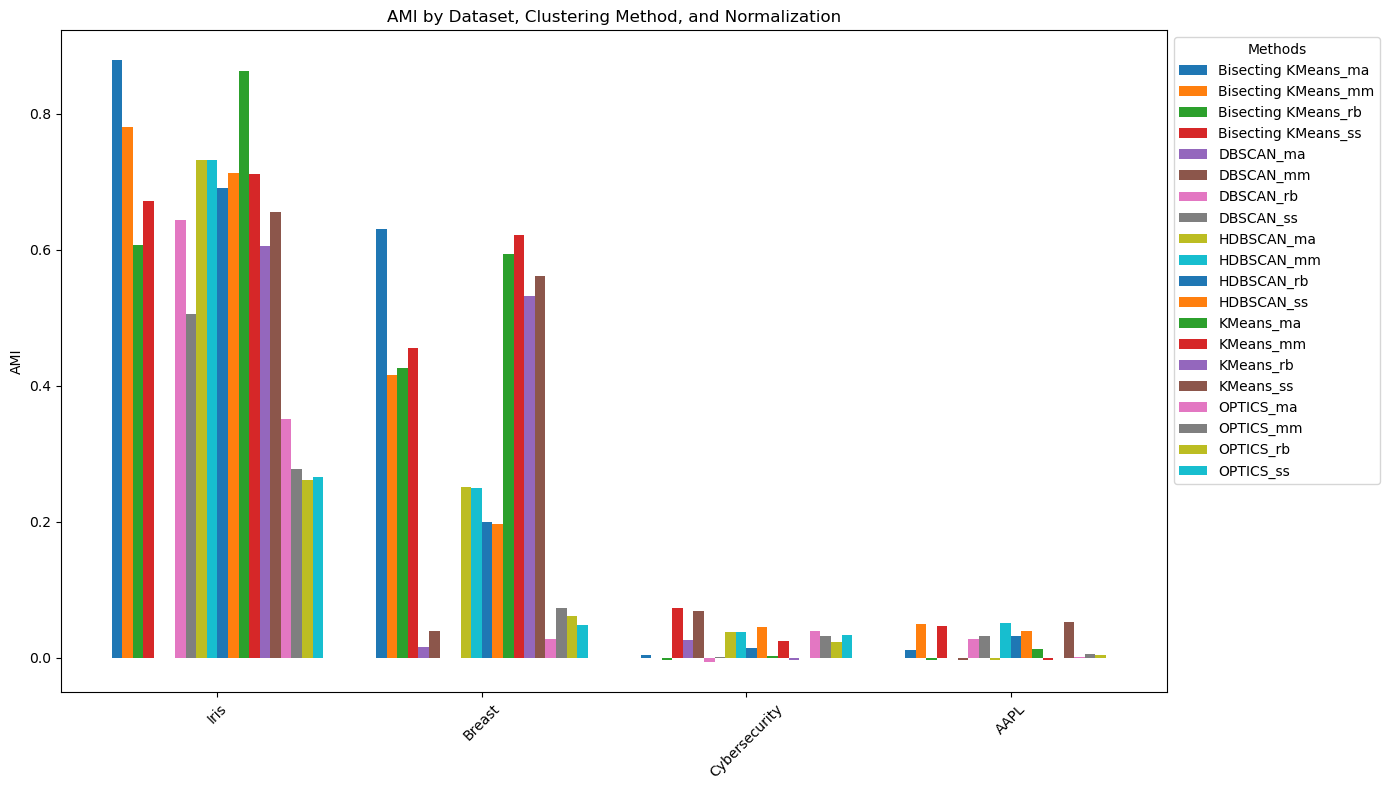

In [44]:
import matplotlib.pyplot as plt
import numpy as np


clustering_methods = set()
normalization_methods = set()
for dataset in data:
    for key in dataset.keys():
        method, norm = key.rsplit('_', 1)
        clustering_methods.add(method)
        normalization_methods.add(norm)

clustering_methods = sorted(list(clustering_methods))
normalization_methods = sorted(list(normalization_methods))

silhouette_scores = {(method, norm): [] for method in clustering_methods for norm in normalization_methods}
for dataset in data:
    for key, scores in dataset.items():
        method, norm = key.rsplit('_', 1)
        silhouette_score = scores[4] if scores[4] is not None else 0
        silhouette_scores[(method, norm)].append(silhouette_score)

fig, ax = plt.subplots(figsize=(14, 8))

num_methods = len(clustering_methods) * len(normalization_methods)
positions = np.arange(len(datasets))
width = 0.8 / num_methods 

for i, (method, norm) in enumerate(silhouette_scores.keys()):
    offset = (i - (num_methods / 2)) * width + (width / 2)
    ax.bar(positions + offset, silhouette_scores[(method, norm)], width, label=f"{method}_{norm}")

ax.set_ylabel('AMI')
ax.set_title('AMI by Dataset, Clustering Method, and Normalization')
ax.set_xticks(positions)
ax.set_xticklabels(datasets)
ax.legend()

plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title="Methods")
plt.tight_layout()

plt.show()